In [1]:
%matplotlib inline
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

# Coverage Plot of a Ranking Classifier

## First part: load the data and fit a scoring classifier

- load the breast cancer dataset using the sklearn.datasets module;
- import the learning algorithm of your choice (e.g., `linear_model.LogisticRegression`);
- use the fit method to learn a new classifier specifying that you want the classifier to be setup to output probability estimates (use parameter 'probability=True' when instantiating the class);
- use the learnt classifier to obtain the scores for the objects in the training set (use the `predict_proba` method);

## Second part: ranking and coverage plot

- Use the scores you just obtained to rank the examples (from higher to lower probability of being in class 1);
- consider all possible classifiers you can obtain from such order by splitting the sequence in two and then deciding to label everything on the left as positive and everything on the right as negative);
- evaluate the number of false positive examples (FP) and the number of true positive examples (TP) for each split;
- plot those values on a scatter plot (hint: use the `matplotlib.pyplot.plot` function);

## Third part: ranking error and the area under the coverage plot

- Write a function `coverage_area` that given a set of (FP,TP) points, evaluates the area under the curve specified by those points;
- Write the function `ranking error` that evaluates the ranking error: 
$$
error=\frac{\sum_{{x^+} \in \mathrm{Pos} }\sum_{{x^-} \in \mathrm{Neg} } I\left[\hat{s}(x^+) < \hat{s}(x^-)\right] + \frac{1}{2} I\left[\hat{s}(x^+) = \hat{s}(x^-)\right]}{\mathrm{|Pos|}\times\mathrm{|Neg|}}
$$
- Verify that $1$ minus the coverage area equals the ranking error.

### Hints:
To write the `coverage_area` function you might want to sum all the rectangles having sides $\Delta \mathrm{TP}$ and $\mathrm{Neg} - \mathrm{FP}$ (see also the picture below and notice that you should assume that the sequence of (FP,TP) points is sorted). 

<img src="./cov-area.png">

In [44]:
X, y = datasets.load_breast_cancer(return_X_y=True)
classifier = LogisticRegression(max_iter=3000).fit(X, y)
res = classifier.predict_proba(X)

[[1.00000000e+00 3.86884279e-14]
 [9.99995984e-01 4.01585687e-06]
 [9.99999441e-01 5.59287871e-07]
 ...
 [9.97805481e-01 2.19451893e-03]
 [1.00000000e+00 8.36603482e-11]
 [1.18628078e-04 9.99881372e-01]]


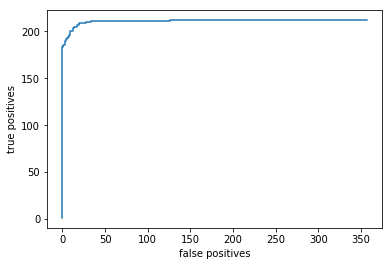

In [72]:
ranking = list(enumerate(res[: , 0])) # class 1
ranking = sorted(ranking, key=lambda x:x[1], reverse=True)
#print(ranking)
classifiers = []
for i in range(len(ranking)):
    tp = 0
    fp = 0
    for j in range(len(ranking)):
        if j <= i:
            if y[ranking[j][0]] == 0:
                tp+=1
            else:
                fp+=1
    classifiers.append((fp, tp))
plt.xlabel("false positives")
plt.ylabel("true positives")
plt.plot(*zip(*classifiers))
plt.show()

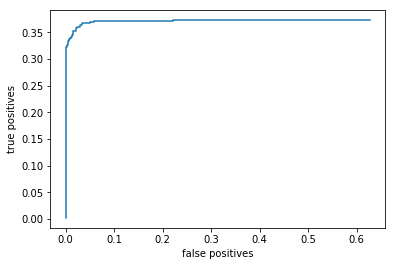

In [79]:
ranking = list(enumerate(res[: , 0])) # class 1
ranking = sorted(ranking, key=lambda x:x[1], reverse=True)
#print(ranking)
classifiers_normalized = []
for i in range(len(ranking)):
    tp = 0
    fp = 0
    for j in range(len(ranking)):
        if j <= i:
            if y[ranking[j][0]] == 0:
                tp+=1
            else:
                fp+=1
    classifiers_normalized.append((fp / len(ranking), tp / len (ranking)))
plt.xlabel("false positives")
plt.ylabel("true positives")
plt.plot(*zip(*classifiers_normalized))
plt.show()

In [87]:
def coverage_area(data, target):
    negatives = len([t for t in target if t == 1])
    positives = len([t for t in target if t == 0])
    oldTP = data[0][1]
    dTP = 0
    area = 0
    for (fp, tp) in data:
        dTP = tp - oldTP
        oldTP = tp
        top = negatives - fp
        area += dTP * top
    return area / (positives * negatives)

def ranking_error(ranking, target):
    positives = len([t for t in target if t == 0])
    negatives = len([t for t in target if t == 1])
    penalty = 0 # only ranking errors: no ties in ranking
    for i in range(len(ranking)):
        if y[ranking[i][0]] == 1:
            for j in range(i+1, len(ranking)):
                if y[ranking[j][0]] == 0:
                    penalty += 1
    return penalty / (positives * negatives)

In [89]:
print(ranking_error(ranking, y))
print(1 - coverage_area(classifiers, y))

0.0053511970826066275
0.010068178214682089
